In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
!nvidia-smi

Sun Apr  9 16:07:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P0    15W /  N/A |    928MiB /  4096MiB |     13%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import os

In [8]:
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
type(x_train)

numpy.ndarray

In [11]:
# flattening the data as we have to pass it to the neural network
x_train = x_train.reshape(-1, 28*28).astype("float32")
x_train = x_train /255

x_test = x_test.reshape(-1, 28*28).astype("float32")
x_test = x_test/255

# x_train = tf.convert_to_tensor(x_train)
# this step will be done internally by tensorflow so not required

In [12]:
# Sequential API of keras-
# very convinient not very flexible 
# i.e only allows one input to one output

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10),
])

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

c:\Users\praya\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
1875/1875 - 16s - loss: 0.1864 - accuracy: 0.9434 - 16s/epoch - 9ms/step
Epoch 2/5
1875/1875 - 5s - loss: 0.0789 - accuracy: 0.9750 - 5s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 4s - loss: 0.0552 - accuracy: 0.9822 - 4s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 4s - loss: 0.0407 - accuracy: 0.9867 - 4s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 4s - loss: 0.0344 - accuracy: 0.9891 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.0719 - accuracy: 0.9802 - 875ms/epoch - 3ms/step


[0.07193974405527115, 0.9801999926567078]

In [14]:
model = keras.Sequential([
    keras.Input(shape=(28*28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(28*28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))


In [15]:
# Funtional

In [17]:
inputs = keras.Input(shape=784)
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(10, activation = 'softmax')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

c:\Users\praya\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
1875/1875 - 6s - loss: 0.1852 - accuracy: 0.9444 - 6s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 5s - loss: 0.0787 - accuracy: 0.9757 - 5s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 5s - loss: 0.0551 - accuracy: 0.9822 - 5s/epoch - 3ms/step
Epoch 4/5
1875/1875 - 5s - loss: 0.0420 - accuracy: 0.9868 - 5s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 6s - loss: 0.0334 - accuracy: 0.9893 - 6s/epoch - 3ms/step
313/313 - 1s - loss: 0.0792 - accuracy: 0.9782 - 1s/epoch - 3ms/step


[0.07923917472362518, 0.9782000184059143]

In [20]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("test.csv")
df.head()

,time,flux
0,0.0,1.00
1,0.1,0.98
2,0.2,0.97
3,0.3,0.96
4,0.4,0.97


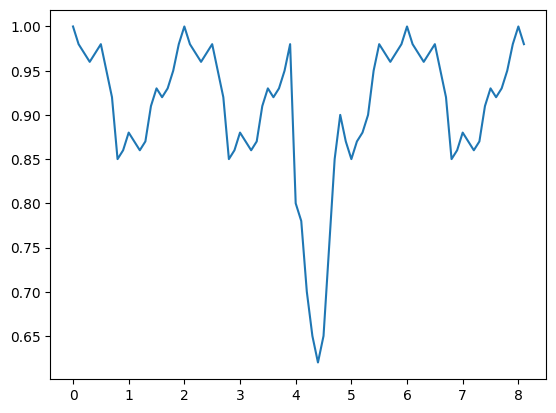

In [34]:
plt.plot(df['time'], df['flux'])

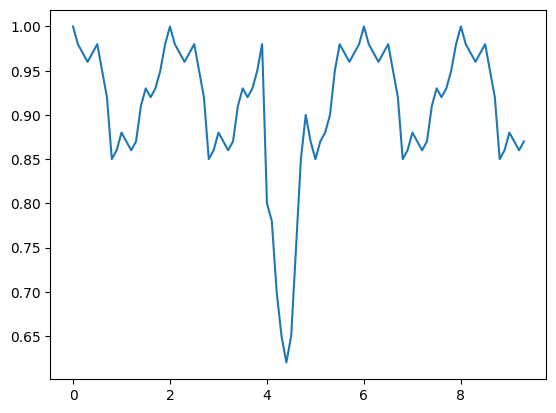

In [36]:
df = pd.read_csv("test.csv")
plt.plot(df['time'], df['flux'])

In [27]:
import seaborn as sns

<AxesSubplot: xlabel='time', ylabel='flux'>

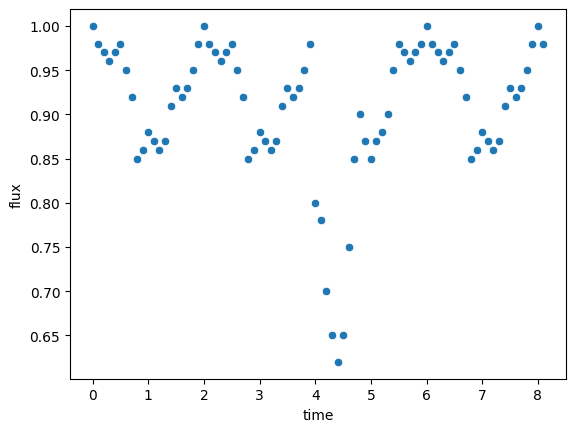

In [35]:
sns.scatterplot(data=df, x='time', y='flux')

In [2]:
"0.8807315        13919.6763
0.6278693        13969.6758
0.6385838        14049.675
0.6450125        13953.0093
0.6535841        13959.6759
0.6600128        14099.6745
0.6171548        14166.3405
0.6235835        14276.3394
0.6685844        14153.0073
0.6878705        14213.0067
0.891446        14033.0085
0.80573        14083.008
0.7821581        14146.3407
0.677156        14233.0065
0.6750131        14286.3393
0.6964421        14303.0058
0.7028708        14569.6698
0.7114424        14503.0038
0.741443        14486.3373
0.7585862        14409.6714
0.7993013        14513.0037
0.7907297        14449.671
0.8443022        14423.0046
0.7671578        14289.6726
0.7350143        14259.6729
0.7500146        14226.3399
0.7735865        14183.007
0.8143016        14166.3405
0.7157282        14293.0059
0.7242998        14286.3393
0.827159        14186.3403
0.8335877        14253.0063
0.8507309        14209.6734
0.9428756        14393.0049
0.9107321        14243.0064
0.9193037        14309.6724
0.9300182        14196.3402
0.9021605        14163.0072
0.998591        14146.3407
0.9750191        14193.0069
0.9643046        14263.0062
0.9535901        14303.0058
0.9857336        14319.6723
0.8743028        14146.3407
0.8593025        14129.6742
1.0307345        14353.0053
1.0543064        14296.3392
1.041449        14263.0062
1.0885928        14266.3395
1.0071626        14226.3399
1.0221629        14243.0064
1.0800212        14213.0067
1.062878        14206.3401
1.1014502        14373.0051
1.127165        14356.3386
1.1657372        14336.3388
1.1400224        14399.6715
1.1528798        14426.3379
1.1764517        14369.6718
1.1185934        14383.005
1.191452        14243.0064
1.2043094        14186.3403
1.2450245        14306.3391
1.2578819        14283.006
1.2171668        14149.674
1.2321671        14163.0072
1.2728822        14193.0069
1.2857396        14153.0073
1.3457408        14049.675
1.3028828        14183.007
1.3157402        14243.0064
1.3307405        14289.6726
1.3607411        14346.3387
1.3735985        14476.3374
1.3885988        14433.0045
1.4035991        14506.3371
1.4507429        14483.004
1.4185994        14453.0043
1.4185994        14449.671
1.4378855        14459.6709
1.4507429        14479.6707
1.470029        14389.6716
1.4807435        14313.0057
1.4978867        14226.3399
1.5171728        14326.3389
1.534316        14376.3384
1.5471734        14143.0074
1.5643166        14169.6738
1.5793169        14093.0079
1.598603        14076.3414
1.6157462        14126.3409
1.6350323        14113.0077
1.6714616        13996.3422
1.6500326        13926.3429
1.6907477        13949.676
1.7078909        13896.3432
1.7807495        13999.6755
1.8193217        14006.3421
1.8000356        14079.6747
1.7614634        14093.0079
1.7250341        14123.0076
1.7443202        14196.3402
1.8578939        14193.0069
1.8386078        14373.0051
1.8793229        14366.3385
1.898609        14276.3394
1.9221809        14296.3392
1.941467        14466.3375
1.984325        14486.3373
1.9607531        14256.3396
2.0036111        14163.0072
2.027183        14133.0075
2.048612        13959.6759
2.1386138        13936.3428
2.070041        13619.6793
2.112899        13593.0129
2.0936129        13746.3447
2.2071866        13769.6778
2.2521875        13836.3438
2.1793289        14013.0087
2.2264727        14019.6753
2.1600428        14193.0069
2.2757594        14249.673
2.3507609        14203.0068
2.2993313        14473.0041
2.3250461        14483.004
2.3743328        14649.669
2.4514772        14686.3353
2.4000476        14306.3391
2.4257624        14183.007
2.477192        14319.6723
2.5286216        14643.0024
2.6079089        14696.3352
2.6379095        14433.0045
2.7514832        14523.0036
2.6679101        14003.0088
2.6957678        14123.0076
2.7193397        14153.0073
2.7814838        13829.6772"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.0.4 requires matplotlib>=3.3.0, but you have matplotlib 3.2.2 which is incompatible.


ImportError: cannot import name '_get_valid_format' from 'astropy.io.registry' (c:\ProgramData\Anaconda3\lib\site-packages\astropy\io\registry\__init__.py)